# <center> **PROJECT-3. EDA + Feature Engineering**
# <center> **Соревнование на Kaggle**

In [1]:
# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import os, sys, re

# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотека для расчетов корреляций
from scipy import stats

# Библиотеки для нормализации и стандартизации
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Библиотека для кодирования признаков
import category_encoders as ce

# Импорт collections для работы с упорядоченным словарём
from collections import OrderedDict

# Читаем файл
hotels = pd.read_csv('data/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [2]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

## **1. РАЗДЕЛЕНИЕ НАБОРА ДАННЫХ**

In [3]:
# Создаём копию датафрейма и удаляем столбцы, содержащие данные типов object и string
df = hotels.drop(
    ['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality',
    'negative_review', 'positive_review', 'tags', 'days_since_review'], axis=1
    )

In [4]:
#  Заполним пропущенные значения
df = df.fillna(method='bfill')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [6]:
'''
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  

X = df.drop(['reviewer_score'], axis = 1) # Х — данные с информацией об отелях  
y = df['reviewer_score'] # у — целевая переменная (рейтинги отелей)   
      
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
'''

'\n# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  \n\nX = df.drop([\'reviewer_score\'], axis = 1) # Х — данные с информацией об отелях  \ny = df[\'reviewer_score\'] # у — целевая переменная (рейтинги отелей)   \n      \n# Загружаем специальный инструмент для разбивки:  \nfrom sklearn.model_selection import train_test_split  \n      \n# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.\n# Для тестирования мы будем использовать 25 % от исходного датасета.  \nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)\n'

In [7]:
'''
# Непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# Категориальные признаки
cat_cols = ['average_score', 'lat']
'''

"\n# Непрерывные признаки\nnum_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']\n\n# Категориальные признаки\ncat_cols = ['average_score', 'lat']\n"

In [8]:
'''
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')
'''

"\ny=y.astype('int')\n\n...\nfrom sklearn.feature_selection import chi2 # хи-квадрат\n\nimp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)\nimp_cat.sort_values(inplace = True)\nimp_cat.plot(kind = 'barh')\n"

In [9]:
'''
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
'''

"\nfrom sklearn.feature_selection import f_classif # anova\n\nimp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)\nimp_num.sort_values(inplace = True)\nimp_num.plot(kind = 'barh')\n"

## **2. СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ**

In [10]:
'''
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
'''

'\n# Импортируем необходимые библиотеки:  \nfrom sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  \nfrom sklearn import metrics # инструменты для оценки точности модели  \n      \n# Создаём модель  \nregr = RandomForestRegressor(n_estimators=100)  \n      \n# Обучаем модель на тестовом наборе данных  \nregr.fit(X_train, y_train)  \n      \n# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  \n# Предсказанные значения записываем в переменную y_pred  \ny_pred = regr.predict(X_test)\n'

## **3. ОЦЕНКА КАЧЕСТВА МОДЕЛИ**

In [11]:
'''
# Сравниваем предсказанные значения (y_pred) с реальными (y_test)
# смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE)
# показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))
'''

"\n# Сравниваем предсказанные значения (y_pred) с реальными (y_test)\n# смотрим, насколько они отличаются  \n# Метрика называется Mean Absolute Percentage Error (MAPE)\n# показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  \nprint('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))\n"

## **4. УЛУЧШЕНИЕ МОДЕЛИ**

In [12]:
hotels['hotel_name'].describe()

count                                         386803
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            3587
Name: hotel_name, dtype: object

In [13]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'], yearfirst=True)
hotels['review_date'].sort_values(ascending=True)

143997   2015-08-04
86268    2015-08-04
159209   2015-08-04
217001   2015-08-04
28485    2015-08-04
            ...    
167325   2017-08-03
372341   2017-08-03
54669    2017-08-03
321881   2017-08-03
315137   2017-08-03
Name: review_date, Length: 386803, dtype: datetime64[ns]

In [14]:
n_hotels = hotels.copy()

def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

n_hotels['tags_n'] = n_hotels['tags'].apply(rev_func)


n_hotels = n_hotels.explode('tags_n')

In [15]:
n_hotels['tags_n'].describe()

count          1767522
unique            2368
top       Leisure trip
freq            313593
Name: tags_n, dtype: object

In [16]:
n_hotels['tags_n'][1]

1           Business trip
1                  Couple
1    Standard Double Room
1          Stayed 1 night
Name: tags_n, dtype: object

In [17]:
# Днные из соревнования

# для обучения
df_train = pd.read_csv('data/hotels_train.csv')

# Для предсказания
df_test = pd.read_csv('data/hotels_test.csv')

# Тестовый сабмишн
sample_submission = pd.read_csv('data/submission.csv')

In [18]:
# Удаление дубликатов в тренировочной выборке

print('В датасете {} дубликатов в тренировочной выборке'.format(df_train[df_train.duplicated()].shape[0]))
df_train.drop_duplicates(inplace=True)
print('Количество строк после удаления дубликатов составляет: {}'.format(df_train.shape[0]))

В датасете 307 дубликатов в тренировочной выборке
Количество строк после удаления дубликатов составляет: 386496


In [19]:
# Удаление дубликатов в тестовой выборке

print('В датасете {} дубликатов в тестовой выборке'.format(df_test[df_test.duplicated()].shape[0]))
df_test.drop_duplicates(inplace=True)
print('Количество строк после удаления дубликатов составляет: {}'.format(df_test.shape[0]))

В датасете 29 дубликатов в тестовой выборке
Количество строк после удаления дубликатов составляет: 128906


In [20]:
# Чтобы не проводить двойные преобразования df_train и df_test, объединим эти два датасета, 
# перед запуском обучения модели их разделим, для их различия введём новый признак 'sample'

# Тренировочный
df_train['sample'] = 1

# Тестовый
df_test['sample'] = 0

df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто помечаем как 0

# Объединяем данные
data = pd.concat([df_test, df_train], sort=False).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515402 entries, 0 to 515401
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515402 non-null  object 
 1   additional_number_of_scoring                515402 non-null  int64  
 2   review_date                                 515402 non-null  object 
 3   average_score                               515402 non-null  float64
 4   hotel_name                                  515402 non-null  object 
 5   reviewer_nationality                        515402 non-null  object 
 6   negative_review                             515402 non-null  object 
 7   review_total_negative_word_counts           515402 non-null  int64  
 8   total_number_of_reviews                     515402 non-null  int64  
 9   positive_review                             515402 non-null  object 
 

### **Проектирование признаков:**

#### 1. Преобразование признака 'hotel_address'

Можно выделить два новых признака:
- страна, 'hotel_country';
- город, 'hotel_city';

Страна в строке указана последней, Англия при поиске образуется как 'Kingdom' - переименуем её как 'United Kingdom';
Город - это второе слово с конца, исключение - Англия - пятое с конца.

In [21]:
data['hotel_address'].value_counts()

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3577
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
8 rue Fr d ric Bastiat 8th arr 75008 Paris France                                   12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: hotel_address, Length: 1493, dtype: i

In [22]:
# Выделяем страну
data['hotel_country'] = data['hotel_address'].apply(lambda x: x.split()[-1])

# Переименовываем 'Kingdom' в 'United Kingdom'
data.loc[data['hotel_country'] == 'Kingdom', 'hotel_country'] = 'United Kingdom'

data['hotel_country'].value_counts()

United Kingdom    262299
Spain              60149
France             59598
Netherlands        57212
Austria            38938
Italy              37206
Name: hotel_country, dtype: int64

In [23]:
# Выделяем город
data['hotel_city'] = data['hotel_address'].apply \
(lambda x: x.split()[-5] if x.split()[-1] == 'Kingdom' else x.split()[-2])

data['hotel_city'].value_counts()

London       262299
Barcelona     60149
Paris         59598
Amsterdam     57212
Vienna        38938
Milan         37206
Name: hotel_city, dtype: int64

In [24]:
# Кодируем страну отеля
data['hotel_country'] = data['hotel_country'].astype('category')
data['hotel_country_code'] = data['hotel_country'].cat.codes

# Кодируем город отеля
data['hotel_city'] = data['hotel_city'].astype('category')
data['hotel_city_code'] = data['hotel_city'].cat.codes

In [25]:
data[['hotel_country', 'hotel_country_code', 'hotel_city', 'hotel_city_code']]

,hotel_country,hotel_country_code,hotel_city,hotel_city_code
0,Italy,2,Milan,3
1,Netherlands,3,Amsterdam,0
2,Spain,4,Barcelona,1
3,Italy,2,Milan,3
4,Netherlands,3,Amsterdam,0
...,...,...,...,...
515397,United Kingdom,5,London,2
515398,Austria,0,Vienna,5
515399,United Kingdom,5,London,2
515400,United Kingdom,5,London,2


Получено два новых признака - страна и город отеля, на основании которых, можно с определенной точностью заполнить пропуски в 'lat', 'lng'.
Пэтому заполним их медианными значениями по городам, в которых находятся отели.

#### 2. Преобразование признаков 'lat, lng' - заполнение пропусков в данных

In [26]:
# Распределение пропусков в 'lat' по городам
print(data[data['lat'].isnull()].groupby('hotel_city', as_index=False).agg(qty=('hotel_city', 'count')),'\n')

  hotel_city   qty
0  Amsterdam     0
1  Barcelona   207
2     London     0
3      Milan     0
4      Paris   382
5     Vienna  2679 



In [27]:
# Распределение пропусков в 'lng' по городам
print(data[data['lng'].isnull()].groupby('hotel_city', as_index=False).agg(qty=('hotel_city', 'count')))

  hotel_city   qty
0  Amsterdam     0
1  Barcelona   207
2     London     0
3      Milan     0
4      Paris   382
5     Vienna  2679


Пропуски распределены в координатных признаках идентично.

In [28]:
# оСоздаём объект SeriesGroupBy
city_data = data.groupby(['hotel_city'], group_keys=False)

# Находим медианные координаты
city_data['lat'].median()
city_data['lng'].median()

# Применим lambda-функцию к SeriesGroupBy, заменяем пропуски соответствующим медианным значением
data['lat'] = city_data['lat'].apply(lambda x: x.fillna(x.median()))
data['lng'] = city_data['lng'].apply(lambda x: x.fillna(x.median()))

data.isnull().sum()

hotel_address                                 0
additional_number_of_scoring                  0
review_date                                   0
average_score                                 0
hotel_name                                    0
reviewer_nationality                          0
negative_review                               0
review_total_negative_word_counts             0
total_number_of_reviews                       0
positive_review                               0
review_total_positive_word_counts             0
total_number_of_reviews_reviewer_has_given    0
tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
sample                                        0
reviewer_score                                0
hotel_country                                 0
hotel_city                                    0
hotel_country_code                      

#### 3. Преобразование признака 'tag'

Cодержательный, но с лишней информаией признак. 

С его помощью можно создать:

- бинарный признак заказа с мобильного устройства, новый признак - 'tag_from_mobile', значение 0 (по умолчанию) - заказ был сделан НЕ с мобильного устройства, 1 - заказ с мобильного устройства;
- бинарный признак поездки с домашним питомцем, новый признак - 'tag_with_pet', где значение 0 (по умолчанию) - заселение без питомца, 1 - с питомцем;
- бинарный признак по типу поездки по наличию тега 'Leisure trip' или 'Business_trip', новый признак - 'tag_leisure_trip', где 0 - деловая поездка, 1 - отдых (по умолчанию);
- категориальный признак по наличию тегов 'Solo traveler', 'Couple', 'Travelers with friends', 'Family with young children' и другие, новый признак - 'tag_reviewer_type', где значения от 1 до 6, в зависимости типа состава группы (найденного тега);
- порядковый признак по тегу 'Stayed night(s)', новый признак - 'tag_count_nights', основанный на количестве ночей пребывания от 1 до максимального значения, значение по умолчанию - 1, проведена минимально 1 ночь;
- бинарный признак по наличию видовых преимуществ из номера, новый признак - 'tag_view_room', значение по умолчанию - 0, т.к. не каждый номер с видовыми преимуществами;
- категориальный признак по тегам 'Standard ...', 'Superior ...', 'Deluxe ...', 'Executive ...' и другие - тип комнаты, новый признак - 'tag_view_room', основанный на категории комнаты, значение по умолчанию - 0, если тег не будет найден.

In [29]:
# Выводим число тегов для каждого отеля в отдельный признак
data['tags_count'] = data['tags'].apply(lambda x: len(re.findall("'[^\'](.+?)[^\']'", x)))

# Посмотрим сколько тегов бывает по количеству, ищем максимум 
data['tags_count'].unique()

array([4, 5, 3, 6, 2, 1], dtype=int64)

In [30]:
# Структура признака 'tag'
print(data[data['tags_count'] == data['tags_count'].max()]['tags'].iloc[0])
print(data[data['tags_count'] == data['tags_count'].max()]['tags'].iloc[1])

[' With a pet ', ' Leisure trip ', ' Family with young children ', ' Double or Twin Room 1 2 Adults ', ' Stayed 7 nights ', ' Submitted from a mobile device ']
[' With a pet ', ' Leisure trip ', ' Couple ', ' Deluxe Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']


Принцип выделения свойств - максимальное количество тегов 6, знаем возможные типы, все, кроме типа комнаты, укладываются в стандартный шаблон.

Будем искать в каждой строке один из 6 известных шаблонов тега и удалять из строки после обработки. Если останется какой-то еще тег - он и будет типом номера.

In [31]:
def get_tags(tags_string):
    """ Функция кодирования отдельных тегов в новый признак

    Args:
        tags_string (str): строкое значение признака 'tags', передаваемое в обработку

    Returns:
        int: возвращает коды будущих признаков
    """

    # Удаляем лишнюю информацию
    tags_string = tags_string.replace('[', '').replace(']', '')
    tags_string = tags_string.replace("' ", '').replace(" '", '')
    
    # Создаём временный список тегов
    tags_list = tags_string.split(',')
    tags_list = list(map(lambda x: x.strip(), tags_list))

    # Кодируем тип клиентов
    reviewer_types = {
        'Solo traveler': 1,
        'Couple': 2,
        'Travelers with friends': 3,
        'Family with young children': 4,
        'Family with older children': 5,
        'Group': 6
    }

    # Кодируем тип комнаты
    global room_types
    room_types = {
            'Other': 0,
            'Premier': 1, 'Royal': 2, 'President': 3, 'Presidential': 4, 'Ordinary': 5, 
            'Adjacent': 6, 'Exception': 7, 'Luxury': 8, 'Panoramic': 9, 'Classic': 10, 
            'Loft': 11, 'Montcalm': 12, 'Privilege': 13, 'Special': 14, 'Camper': 15, 
            'Sensation': 16, 'Classique': 17, 'Privilege': 18, 'Wonderful': 19, 'Deluxe': 20,
            'Premium': 21, 'Quadruple': 22, 'Triple': 23, 'Duplex': 24, 'Penthouse': 25, 
            'Townhouse': 26, 'Connecting': 27, 'Apartment': 28, 'Apartments': 29, 'Queen': 30, 
            'King': 31, 'Comfort': 32, 'Large': 33, 'Cosy': 34, 'Cozy': 35, 
            'Extra': 36, 'Plus': 37, 'Club': 38, 'Art': 39, 'View': 40,
            'Studio': 41, 'City': 42, 'Emotion': 43, 'Suite': 44, 'Executive': 45,
            'Superior': 46, 'Guest': 47, 'Family': 48, 'Business': 49,
    }

    # Начальные значения новых признаков
    tag_from_mobile = 0
    tag_with_pet = 0
    
    # Не считаем поездку командировкой, значение по умолчанию 1
    tag_leisure_trip = 1

    # По умолчанию считаем, что клиент передвигается один и без детей
    tag_reviewer_type = 1
    
    # Если отзыв оставлен и отсутствуют ключевые слова 'Stayed _ night(s)',
    # будем считать, что проведена минимально 1 ночь, значение по умолчанию 1
    tag_count_nights = 1
    
    # Номер по умолчанию без дополнительных опций
    tag_view_room = 0

    # Если комната в тегах отсутствует, значение по умолчанию 0
    tag_room_type = 0

    # Кодируем значения обнаруженных признаков при их наличии во временном списке:
    for _tag in list(tags_list):
        # признак - "отправлено с мобильного устройства"
        if _tag == 'Submitted from a mobile device':
            tag_from_mobile = 1
            tags_list.remove(_tag)

        # признак - путешествие с домашними питомцами
        if _tag == 'With a pet':
            tag_with_pet = 1
            tags_list.remove(_tag)

        # признак - поездка рабочая (командировка)
        if _tag == 'Business trip':
            tag_leisure_trip = 0
            tags_list.remove(_tag)

        # признак - поездка не связана с работой (отпуск)
        if _tag == 'Leisure trip':
            # просто убираем тег из временного списка, т.к. значение по умолчанию 1
            # tag_leisure_trip = 1
            tags_list.remove(_tag)

        # признак - количество клиентов
        if _tag in reviewer_types.keys():
            tag_reviewer_type = reviewer_types[_tag]
            tags_list.remove(_tag)

        # признак - количество ночей
        if re.fullmatch(r'Stayed\s\d+\snight\w?', _tag):
            tag_count_nights = [int(n) for n in re.findall(r'-?\d+\.?\d*', _tag)][0]
            tags_list.remove(_tag)

        # признак - имеется тег "номер с видом на..."
        if len(tags_list) > 0:
            if ('View' in tags_list[0]) | ('Panoramic' in tags_list[0]):
                tag_view_room = 1

            # кодируем тип номера
            for r_t in room_types.keys():
                if r_t in tags_list[0]:
                    tag_room_type = room_types[r_t]

            # исключения, т.к. тег идет как 'Double or Twin Room 1 2 Adults'
            if ('Double' in tags_list[0]) | ('Twin' in tags_list[0]):
                tag_room_type = 50

    return tag_from_mobile, tag_with_pet, tag_leisure_trip, \
        tag_reviewer_type, tag_count_nights, tag_view_room, tag_room_type

# Создаём новые признаки
data[['tag_from_mobile', 'tag_with_pet', 'tag_leisure_trip', 
        'tag_reviewer_type', 'tag_count_nights', 'tag_view_room', 'tag_room_type']
] = pd.DataFrame(data['tags'].apply(get_tags).to_list(), index=data.index).astype('int8')

In [32]:
# Маску для отбора тренировочных значений
sample_mask = data['sample'] == 1

# Распределение по типам помещений 
data[sample_mask].groupby(by='tag_room_type')['tag_room_type'].agg(['count']).sort_index(ascending=True)

,count
tag_room_type,
0,21730
1,180
2,45
4,2
5,66
6,83
7,1
8,360
9,21


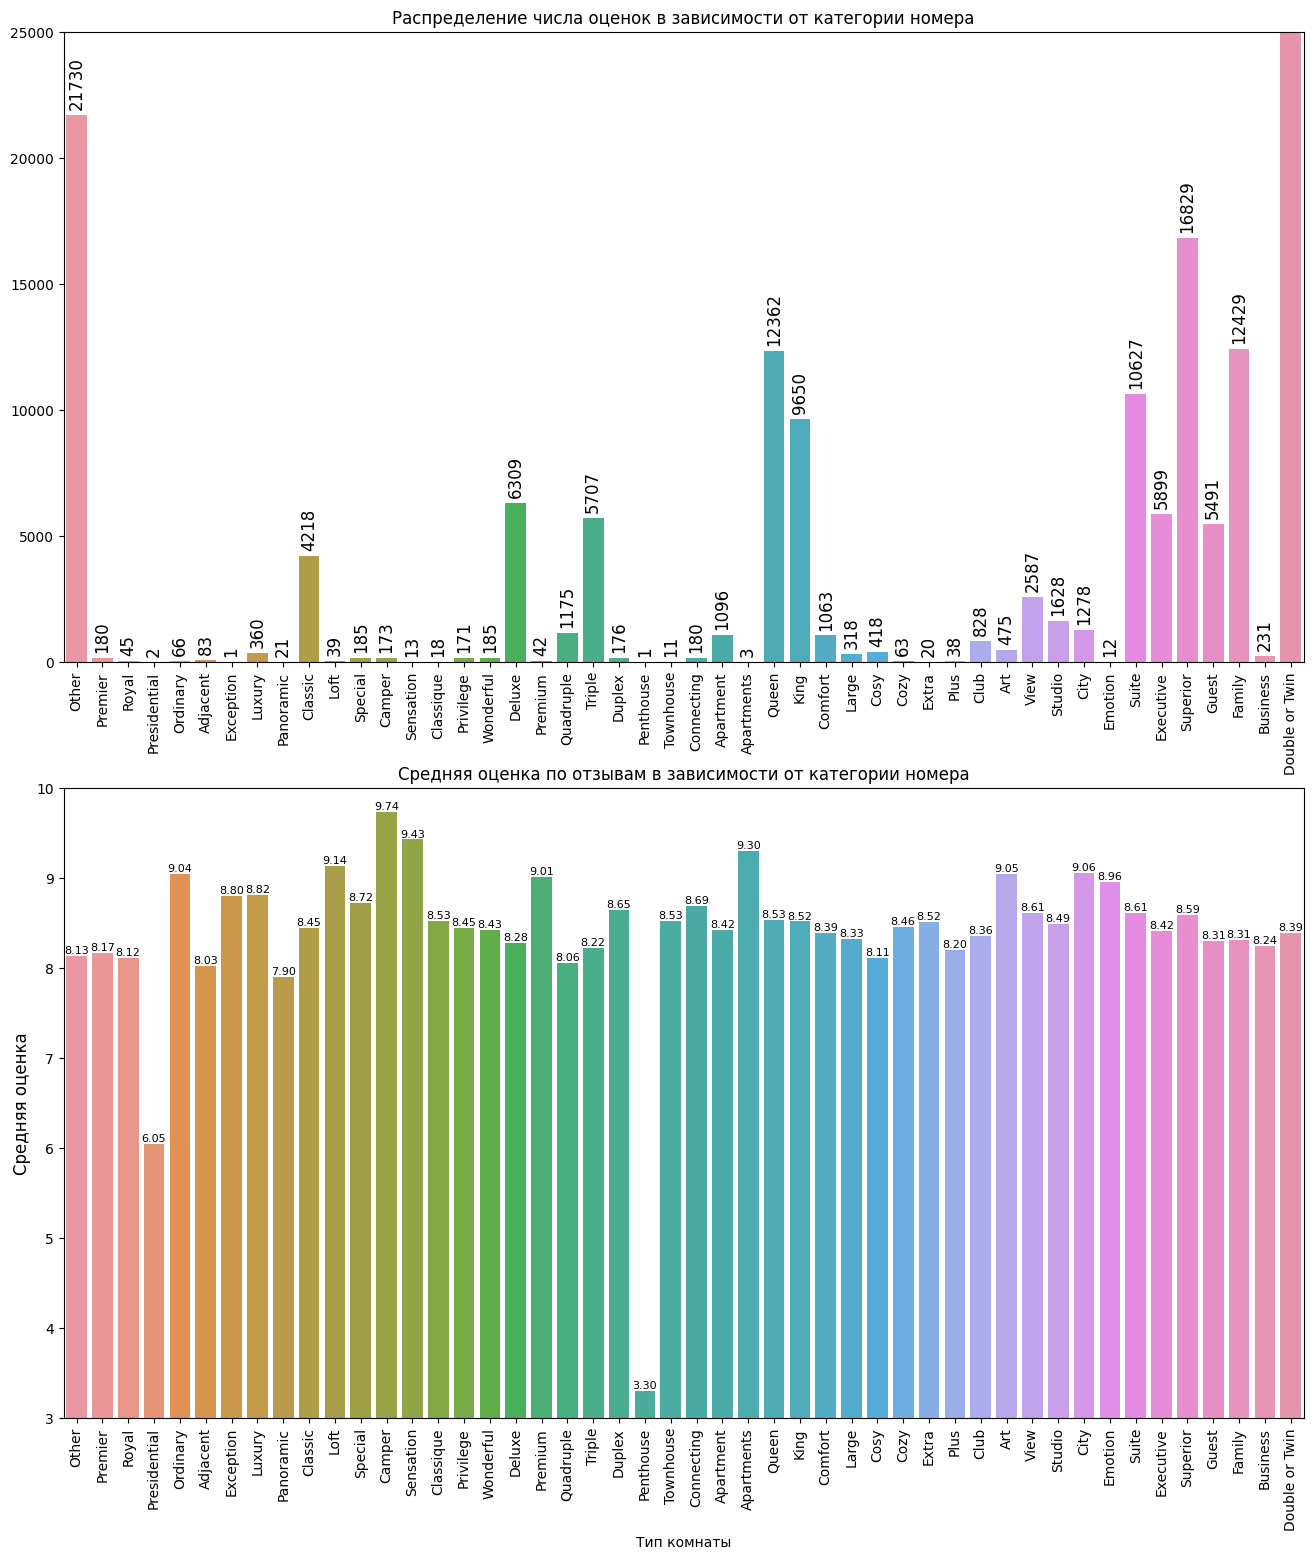

In [33]:
# График различия в оценках туристов, в зависимости от типа номера
pivot_types = pd.pivot_table(data[sample_mask], 
    index='tag_room_type', 
    values='reviewer_score', 
    aggfunc=['count', 'mean'])

# Заготовка списка меток названий помещений для графика

# убираем НЕ найденные теги
missed_room_types = [3, 12, 13] # не найденный тип помещения

# собираем в упорядоченный словарь
room_type_ord_dict = OrderedDict(
    (k, v) 
    for k, v in sorted(room_types.items(), key=lambda x: x[1]) 
        if v not in missed_room_types
)

# забираем ключи от пар
room_type_list = list(room_type_ord_dict.keys())

# добавляем исключение вручную
room_type_list.append('Double or Twin')

fig, ax = plt.subplots(2, 1, figsize=(16, 18))
bar_types_1 = sns.barplot(
    x=pivot_types.index, 
    y=pivot_types[('count', 'reviewer_score')],
    ax=ax[0]
)

ax[0].set(ylabel=None, xlabel=None, title='Распределение числа оценок в зависимости от категории номера')
ax[0].set_xticklabels(room_type_list)
ax[0].tick_params(axis='x', rotation=90)

bar_types_2 = sns.barplot(
    x=pivot_types.index, 
    y=pivot_types[('mean', 'reviewer_score')], 
    ax=ax[1]
)

ax[1].set(xlabel='Тип комнаты', title='Средняя оценка по отзывам в зависимости от категории номера')
ax[1].set_xticklabels(room_type_list)
ax[1].set_ylabel('Средняя оценка', fontsize = 12)
ax[1].tick_params(axis='x', rotation=90)

for p in bar_types_1.patches:
    bar_types_1.annotate(
        '{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height() + 200),
        ha='center', 
        va='bottom', 
        rotation=90,
        fontsize=12
)

for p in bar_types_2.patches:
    bar_types_2.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height()),
        ha='center', 
        va='bottom', 
        fontsize=8
)

bar_types_1.set_ylim(0, 25000)
bar_types_2.set_ylim(3, 10)
plt.show();

In [34]:
data[['tag_from_mobile', 'tag_with_pet', 'tag_leisure_trip', 
        'tag_reviewer_type', 'tag_count_nights', 'tag_room_type', 'tag_view_room']].nunique()

tag_from_mobile       2
tag_with_pet          2
tag_leisure_trip      2
tag_reviewer_type     6
tag_count_nights     31
tag_room_type        48
tag_view_room         2
dtype: int64

In [35]:
data[['tag_from_mobile', 'tag_with_pet', 'tag_leisure_trip', 
        'tag_reviewer_type', 'tag_count_nights', 'tag_room_type', 'tag_view_room']].head()

,tag_from_mobile,tag_with_pet,tag_leisure_trip,tag_reviewer_type,tag_count_nights,tag_room_type,tag_view_room
0,0,0,1,2,2,50,0
1,0,0,1,6,1,23,0
2,1,0,0,1,1,50,0
3,0,0,1,2,1,44,0
4,1,0,0,1,2,50,0


#### 4. Преобразование признака 'reviewer_nationality'

In [36]:
# Удаляем пробелы
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip())

# Распределение национальности клиентов
data['reviewer_nationality'].value_counts(normalize=True).nlargest(30) * 100

United Kingdom              47.566366
United States of America     6.865515
Australia                    4.202933
Ireland                      2.875231
United Arab Emirates         1.984858
Saudi Arabia                 1.735538
Netherlands                  1.700032
Switzerland                  1.682570
Germany                      1.539381
Canada                       1.530068
France                       1.411520
Israel                       1.281136
Italy                        1.186064
Belgium                      1.169184
Turkey                       1.055681
Kuwait                       0.954013
Spain                        0.918700
Romania                      0.882612
Russia                       0.756303
South Africa                 0.741169
India                        0.666276
Greece                       0.659873
China                        0.659097
Sweden                       0.653082
New Zealand                  0.627665
Singapore                    0.599338
Hong Kong   

In [37]:
# Топ 20 национальностей (оставляем Россию)
top_20_tourist_nations = data['reviewer_nationality'].value_counts().nlargest(19).index
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
    lambda x:x if x in top_20_tourist_nations else 'Other')
data['reviewer_nationality'].value_counts(normalize=True) * 100

United Kingdom              47.566366
Other                       18.702295
United States of America     6.865515
Australia                    4.202933
Ireland                      2.875231
United Arab Emirates         1.984858
Saudi Arabia                 1.735538
Netherlands                  1.700032
Switzerland                  1.682570
Germany                      1.539381
Canada                       1.530068
France                       1.411520
Israel                       1.281136
Italy                        1.186064
Belgium                      1.169184
Turkey                       1.055681
Kuwait                       0.954013
Spain                        0.918700
Romania                      0.882612
Russia                       0.756303
Name: reviewer_nationality, dtype: float64

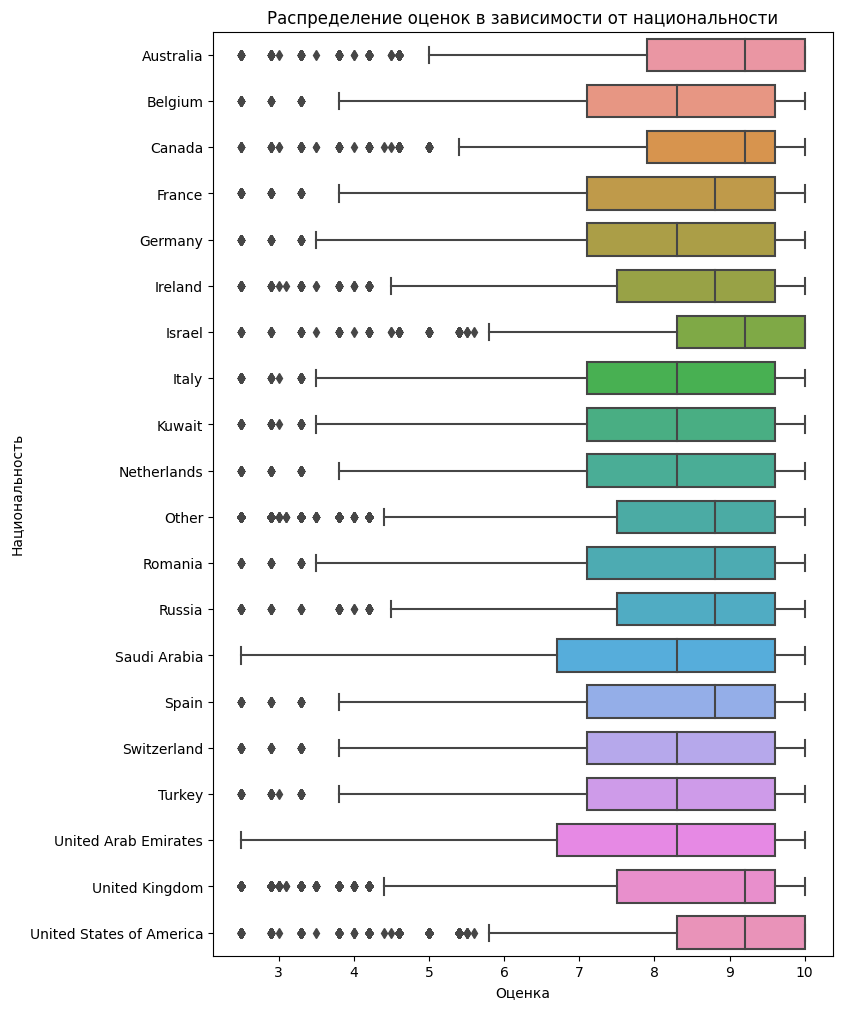

In [38]:
# Зависимость оценки от национальности
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 12))

# График
nationality = sns.boxplot(
    data = data[sample_mask].sort_values(by='reviewer_nationality', ascending=True),
    y = 'reviewer_nationality',
    x = 'reviewer_score',
    orient ='h',
    width = 0.7
)

nationality.set(xlabel='Оценка', ylabel='Национальность', title='Распределение оценок в зависимости от национальности');

Наибольший диапазон оценок у Саудовской Аравии и ОАЭ.
Наивысшая медиана оценок у Великобритании, США, Канады и Австралии.

Так как есть связь между оценкой рецензента и национальностью, то применим кодирование Target Encoding, таким кодированием сформируем признак 'reviewer_nationality' в зависимости от оценки. Параметры кодировщика будем использовать стандартные, по умолчанию.

In [39]:
# Кодируем признак
data['reviewer_nationality'] = data['reviewer_nationality'].astype('category')
reviewer_nationality_te = ce.TargetEncoder(
    min_samples_leaf=20, smoothing=10).fit_transform(
        data['reviewer_nationality'], data['reviewer_score'])

# Переименовываем признак для удобства отбора
reviewer_nationality_te.rename(columns={'reviewer_nationality': 'reviewer_nationality_te'}, inplace=True)
data = pd.concat([data, reviewer_nationality_te], axis=1)

In [40]:
data[['reviewer_nationality', 'reviewer_nationality_te']]

,reviewer_nationality,reviewer_nationality_te
0,United Kingdom,6.369398
1,Belgium,6.131530
2,Other,6.154478
3,United States of America,6.576360
4,United Kingdom,6.369398
...,...,...
515397,France,6.187079
515398,Turkey,6.027771
515399,Netherlands,6.127277
515400,United Arab Emirates,5.872620


#### 5. Преобразование признака 'review_date'

In [41]:
# Переводим в формат datetime64
data['review_date'] = pd.to_datetime(data['review_date'], yearfirst=True)

# Создаём новый признак 'год-месяц'
data['year_month'] = data['review_date'].dt.to_period("M")

(8.0, 8.7)

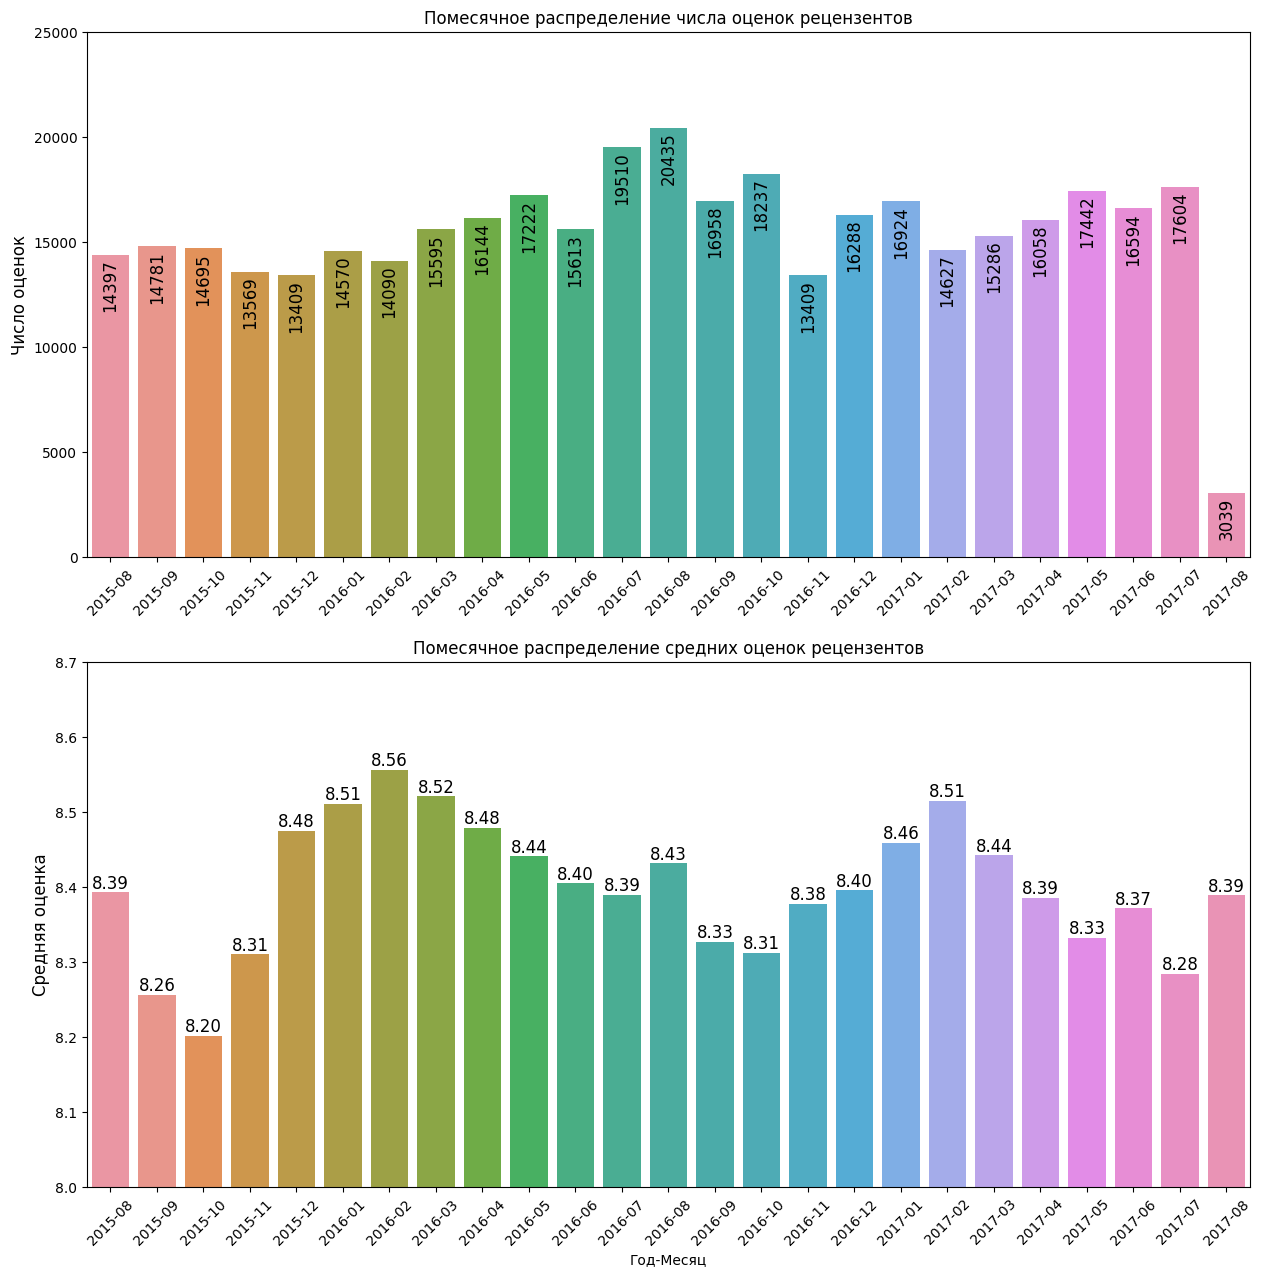

In [42]:
# График для визуализации разницы средних оценок
period = data[data['sample']==1].pivot_table(
    values='reviewer_score',
    index='year_month',
    aggfunc=['mean', 'count']
)

fig, ax = plt.subplots(2, 1, figsize=(15, 15))
bar_period_1 = sns.barplot(
    x=period.index, 
    y=period[('count', 'reviewer_score')], 
    ax=ax[0]
)
ax[0].set(xlabel=None, title='Помесячное распределение числа оценок рецензентов')
ax[0].set_ylabel('Число оценок', fontsize = 12)
ax[0].tick_params(axis='x', rotation=45)

bar_period_2 = sns.barplot(
    x=period.index, 
    y=period[('mean', 'reviewer_score')], 
    ax=ax[1]
)
ax[1].set(xlabel='Год-Месяц', title='Помесячное распределение средних оценок рецензентов')
ax[1].set_ylabel('Средняя оценка', fontsize = 12)
ax[1].tick_params(axis='x', rotation=45)

for p in bar_period_1.patches:
    bar_period_1.annotate(
        '{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height() - 200),
        ha='center', 
        va='top', 
        rotation=90,
        fontsize=12
)

for p in bar_period_2.patches:
    bar_period_2.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height()),
        ha='center', 
        va='bottom', 
        fontsize=12
)

bar_period_1.set_ylim(0, 25000)
bar_period_2.set_ylim(8, 8.7)

Так как есть связь между оценкой и сезоном, это минимум 4 месяца в году, то применим кодирование Target Encoding.

In [43]:
# Кодируем признак 'year_month'
data['year_month'] = data['year_month'].astype('category')
period_te = ce.TargetEncoder(
    min_samples_leaf=20, smoothing=10).fit_transform(
        data['year_month'], data['reviewer_score']
)

# Переименовываем признак для удобства отбора
period_te.rename(columns={'year_month': 'year_month_te'}, inplace=True)
data = pd.concat([data, period_te], axis=1)

In [44]:
data[['year_month', 'year_month_te']]

,year_month,year_month_te
0,2017-07,6.227715
1,2016-12,6.310226
2,2015-11,6.249665
3,2015-10,6.192801
4,2016-05,6.304085
...,...,...
515397,2017-04,6.294358
515398,2017-02,6.385470
515399,2016-02,6.397485
515400,2017-05,6.208258


#### 6. Преобразование признака 'days_since_review'

In [45]:
# Из признака 'days_since_review' выделим число, удаляем дни, меняем тип данных на int.
data['days_since_review'] = data['days_since_review'].apply(
    lambda x: int(re.findall(r'\d+', x)[0])).astype('int16')

In [46]:
data['days_since_review']

0          13
1         234
2         616
3         656
4         444
         ... 
515397    106
515398    171
515399    543
515400     74
515401    363
Name: days_since_review, Length: 515402, dtype: int16

In [47]:
data['days_since_review'].max()

730

#### 7. Преобразование признака 'hotel_name'

In [48]:
# Сводная таблица с уникальным числом имён отелей и адресами
pivot_name_addr = data[['hotel_address', 'hotel_name']].groupby(
    by='hotel_name').nunique()

# Убираем дубликаты
mask_hotel_name = pivot_name_addr['hotel_address'] != 1
hotel_name_dupl = pivot_name_addr[mask_hotel_name].index.to_list()

# Число отелей с именами-дубликатами
mask_name_dupl = data['hotel_name'].isin(hotel_name_dupl)
hotel_addr_dupl = data[mask_name_dupl][['hotel_name', 'hotel_address']].value_counts()
hotel_addr_dupl

hotel_name    hotel_address                                             
Hotel Regina  Bergara 2 4 Eixample 08002 Barcelona Spain                    590
              Rooseveltplatz 15 09 Alsergrund 1090 Vienna Austria           284
              Via Cesare Correnti 13 Milan City Center 20123 Milan Italy     60
dtype: int64

In [49]:
# Преобразовываем названия отелей, добавив в название город
data['hotel_name'] = data.apply(
    lambda row: (row['hotel_name'] + ' ' + row['hotel_address'].split()[-2])
    if (row['hotel_name'] in hotel_name_dupl)
    else row['hotel_name'], axis=1)

mask = data['hotel_name'].str.contains(hotel_name_dupl[0])
data[mask]['hotel_name'].value_counts()

Hotel Regina Barcelona    590
Hotel Regina Vienna       284
Hotel Regina Milan         60
Name: hotel_name, dtype: int64

In [50]:
# Кодируем признак
data['hotel_name'] = data['hotel_name'].astype('category')
data['hotel_name_code'] = data['hotel_name'].cat.codes

In [51]:
data['hotel_name_code']

0          612
1         1447
2           33
3          735
4          633
          ... 
515397     711
515398     104
515399     177
515400    1366
515401    1373
Name: hotel_name_code, Length: 515402, dtype: int16

#### 8. Преобразование признаков 'negative_review', 'positive_review'

In [52]:
# Удаляем пробелы в негативных отызвах
data['negative_review'] = data['negative_review'].apply(lambda x: x.strip())
data['negative_review'].value_counts().reset_index().head(20)

,index,negative_review
0,No Negative,127807
1,Nothing,18525
2,nothing,2506
3,None,1166
4,N A,1060
5,,849
6,Nothing really,569
7,N a,520
8,All good,469
9,Small room,455


In [53]:
# Удаляем пробелы в позитивных отзывов
data['positive_review'] = data['positive_review'].apply(lambda x: x.strip())
data['positive_review'].value_counts().reset_index().head(20)

,index,positive_review
0,No Positive,35923
1,Location,10126
2,Everything,2897
3,location,1733
4,Nothing,1466
5,Great location,1417
6,The location,1338
7,Good location,1202
8,Breakfast,664
9,Friendly staff,602


In [54]:
# Импорт библиотеки для анализа текста
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon', quiet=True)

# Корректируем выражения 
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('No Negative', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('N A', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('All good', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('No complaints', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('Nothing to dislike', 'Positive'))
data['positive_review'] = data['positive_review'].apply(lambda x: x.replace('No Positive', 'Negative'))

# создаем два экземпляра анализатора, чтобы разделить лексикон 
# для разной системы оценки положительных и отрицательных отзывов
sia_neg = SentimentIntensityAnalyzer()
sia_pos = SentimentIntensityAnalyzer()

# добавим контекст, чтобы "No Negative" тонально нёс негативную окраску
neg_words = {'small': -1, 'nothing': 10}
pos_words = {'nothing': -10, 'everything': 10}
sia_neg.lexicon.update(neg_words)
sia_pos.lexicon.update(pos_words)

data['neg_scores'] = data['negative_review'].apply(lambda x: sia_neg.polarity_scores(x))
data['pos_scores'] = data['positive_review'].apply(lambda x: sia_pos.polarity_scores(x))

# формируем новые признаки
data['n_review_sentiments_neg'] = data['neg_scores'].apply(lambda x: x['neg'])
data['n_review_sentiments_neu'] = data['neg_scores'].apply(lambda x: x['neu'])
data['n_review_sentiments_pos'] = data['neg_scores'].apply(lambda x: x['pos'])
data['n_review_sentiments_compound'] = data['neg_scores'].apply(lambda x: x['compound'])

data['p_review_sentiments_neg'] = data['pos_scores'].apply(lambda x: x['neg'])
data['p_review_sentiments_neu'] = data['pos_scores'].apply(lambda x: x['neu'])
data['p_review_sentiments_pos'] = data['pos_scores'].apply(lambda x: x['pos'])
data['p_review_sentiments_compound'] = data['pos_scores'].apply(lambda x: x['compound'])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515402 entries, 0 to 515401
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515402 non-null  object        
 1   additional_number_of_scoring                515402 non-null  int64         
 2   review_date                                 515402 non-null  datetime64[ns]
 3   average_score                               515402 non-null  float64       
 4   hotel_name                                  515402 non-null  category      
 5   reviewer_nationality                        515402 non-null  category      
 6   negative_review                             515402 non-null  object        
 7   review_total_negative_word_counts           515402 non-null  int64         
 8   total_number_of_reviews                     515402 non-null  int64        

#### 9. Преобразование признаков 'review_total_negative_word_counts', 'review_total_positive_word_counts'

Целевая переменная демонстрирует зависимость от обеих величин. Соединим оба признака в один, вычислив разницу количества слов в позитивной и негативной частях отзыва, предварительно нормализуем оба признака.

In [56]:
# Для нормализации, стандартизации
from sklearn import preprocessing

# Кодируем исходный признак
data_ttl_pos_words_cnts_mm = preprocessing.MinMaxScaler().fit_transform(
    data[['review_total_positive_word_counts']])
data_ttl_neg_words_cnts_mm = preprocessing.MinMaxScaler().fit_transform(
    data[['review_total_negative_word_counts']])

# преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_ttl_pos_words_cnts_mm = pd.DataFrame(
    data_ttl_pos_words_cnts_mm, columns=['review_ttl_pos_word_cnts_norm'])
data_ttl_neg_words_cnts_mm = pd.DataFrame(
    data_ttl_neg_words_cnts_mm, columns=['review_ttl_neg_word_cnts_norm'])

# посмотреть результаты
# display(data_ttl_pos_words_cnts_mm, data_ttl_neg_words_cnts_mm)

# добавляем к основному датасету
data = pd.concat([data, data_ttl_pos_words_cnts_mm], axis=1)
data = pd.concat([data, data_ttl_neg_words_cnts_mm], axis=1)

# соединим эти показатели в один - разностный
data['review_ttl_word_cnts_diff_norm'] = data['review_ttl_pos_word_cnts_norm'] - \
    data['review_ttl_neg_word_cnts_norm']

# добавим флаг, который показывает преобладают ли позитивные слова 
# над негативными в размерностях соответствующих диапазонов
data['more_positive_words_flag'] = data['review_ttl_word_cnts_diff_norm'].apply(
    lambda x: 1 if x >= 0 else 0).astype('int8')

Также добавим долю одной из частей (второй показатель будет обратно пропорциональным).

In [57]:

# Создаём новый дополнительный признак из числа основных
data['review_total_word_counts'] = data['review_total_positive_word_counts'] + \
    data['review_total_negative_word_counts']

# Если общее количество слов равно 0, то считаем обе части равнозначными - по 0.5
data['review_positive_word_proportion'] = data.apply(
    lambda x: 0.5 if x['review_total_word_counts'] == 0 \
        else (x['review_total_positive_word_counts'] / x['review_total_word_counts']),
    axis=1)

# Удаление вспомогательных дополнительных признаков
data.drop(['review_ttl_pos_word_cnts_norm', 
    'review_ttl_neg_word_cnts_norm', 
    'review_ttl_word_cnts_diff_norm',
    'review_total_word_counts'], axis = 1, inplace=True)

In [58]:
data[['more_positive_words_flag', 'review_positive_word_proportion']]

,more_positive_words_flag,review_positive_word_proportion
0,1,0.543860
1,0,0.000000
2,1,0.625000
3,1,1.000000
4,1,1.000000
...,...,...
515397,1,1.000000
515398,1,1.000000
515399,0,0.428571
515400,1,1.000000


#### 10. Преобразование признака 'total_number_of_reviews_reviewer_has_given'

In [59]:
# Вычисляем долю отзывов от общего числа отзывов в датасете
data['ratio_of_review'] = data['total_number_of_reviews_reviewer_has_given'] / \
    data['total_number_of_reviews']

# Логарифмируем значение признака
data['total_number_of_reviews_reviewer_has_given'] = data['total_number_of_reviews_reviewer_has_given'].apply(
    lambda x: np.log(x + 1))

In [60]:
data['ratio_of_review']

0         0.000060
1         0.001395
2         0.042735
3         0.005833
4         0.000427
            ...   
515397    0.016207
515398    0.000310
515399    0.007634
515400    0.017869
515401    0.001654
Name: ratio_of_review, Length: 515402, dtype: float64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515402 entries, 0 to 515401
Data columns (total 47 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515402 non-null  object        
 1   additional_number_of_scoring                515402 non-null  int64         
 2   review_date                                 515402 non-null  datetime64[ns]
 3   average_score                               515402 non-null  float64       
 4   hotel_name                                  515402 non-null  category      
 5   reviewer_nationality                        515402 non-null  category      
 6   negative_review                             515402 non-null  object        
 7   review_total_negative_word_counts           515402 non-null  int64         
 8   total_number_of_reviews                     515402 non-null  int64        

### **Очистка и выбор признаков**

In [62]:
# Отбираем нечисловые признаки
object_columns = [col for col in data.columns
    if ((data[col].dtypes == 'object') | \
        (data[col].dtype.name == 'category') | \
        (data[col].dtypes == 'datetime64[ns]'))]

# Список
print(f'Удалению подлежит {len(object_columns)} столбцов с нечисловыми данными:')
object_columns

Удалению подлежит 12 столбцов с нечисловыми данными:


['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'hotel_country',
 'hotel_city',
 'year_month',
 'neg_scores',
 'pos_scores']

In [63]:
data.drop(object_columns, axis = 1, inplace=True)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515402 entries, 0 to 515401
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515402 non-null  int64  
 1   average_score                               515402 non-null  float64
 2   review_total_negative_word_counts           515402 non-null  int64  
 3   total_number_of_reviews                     515402 non-null  int64  
 4   review_total_positive_word_counts           515402 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515402 non-null  float64
 6   days_since_review                           515402 non-null  int16  
 7   lat                                         515402 non-null  float64
 8   lng                                         515402 non-null  float64
 9   sample                                      515402 non-null  int64  
 

### **Анализ мультиколлинеарности**

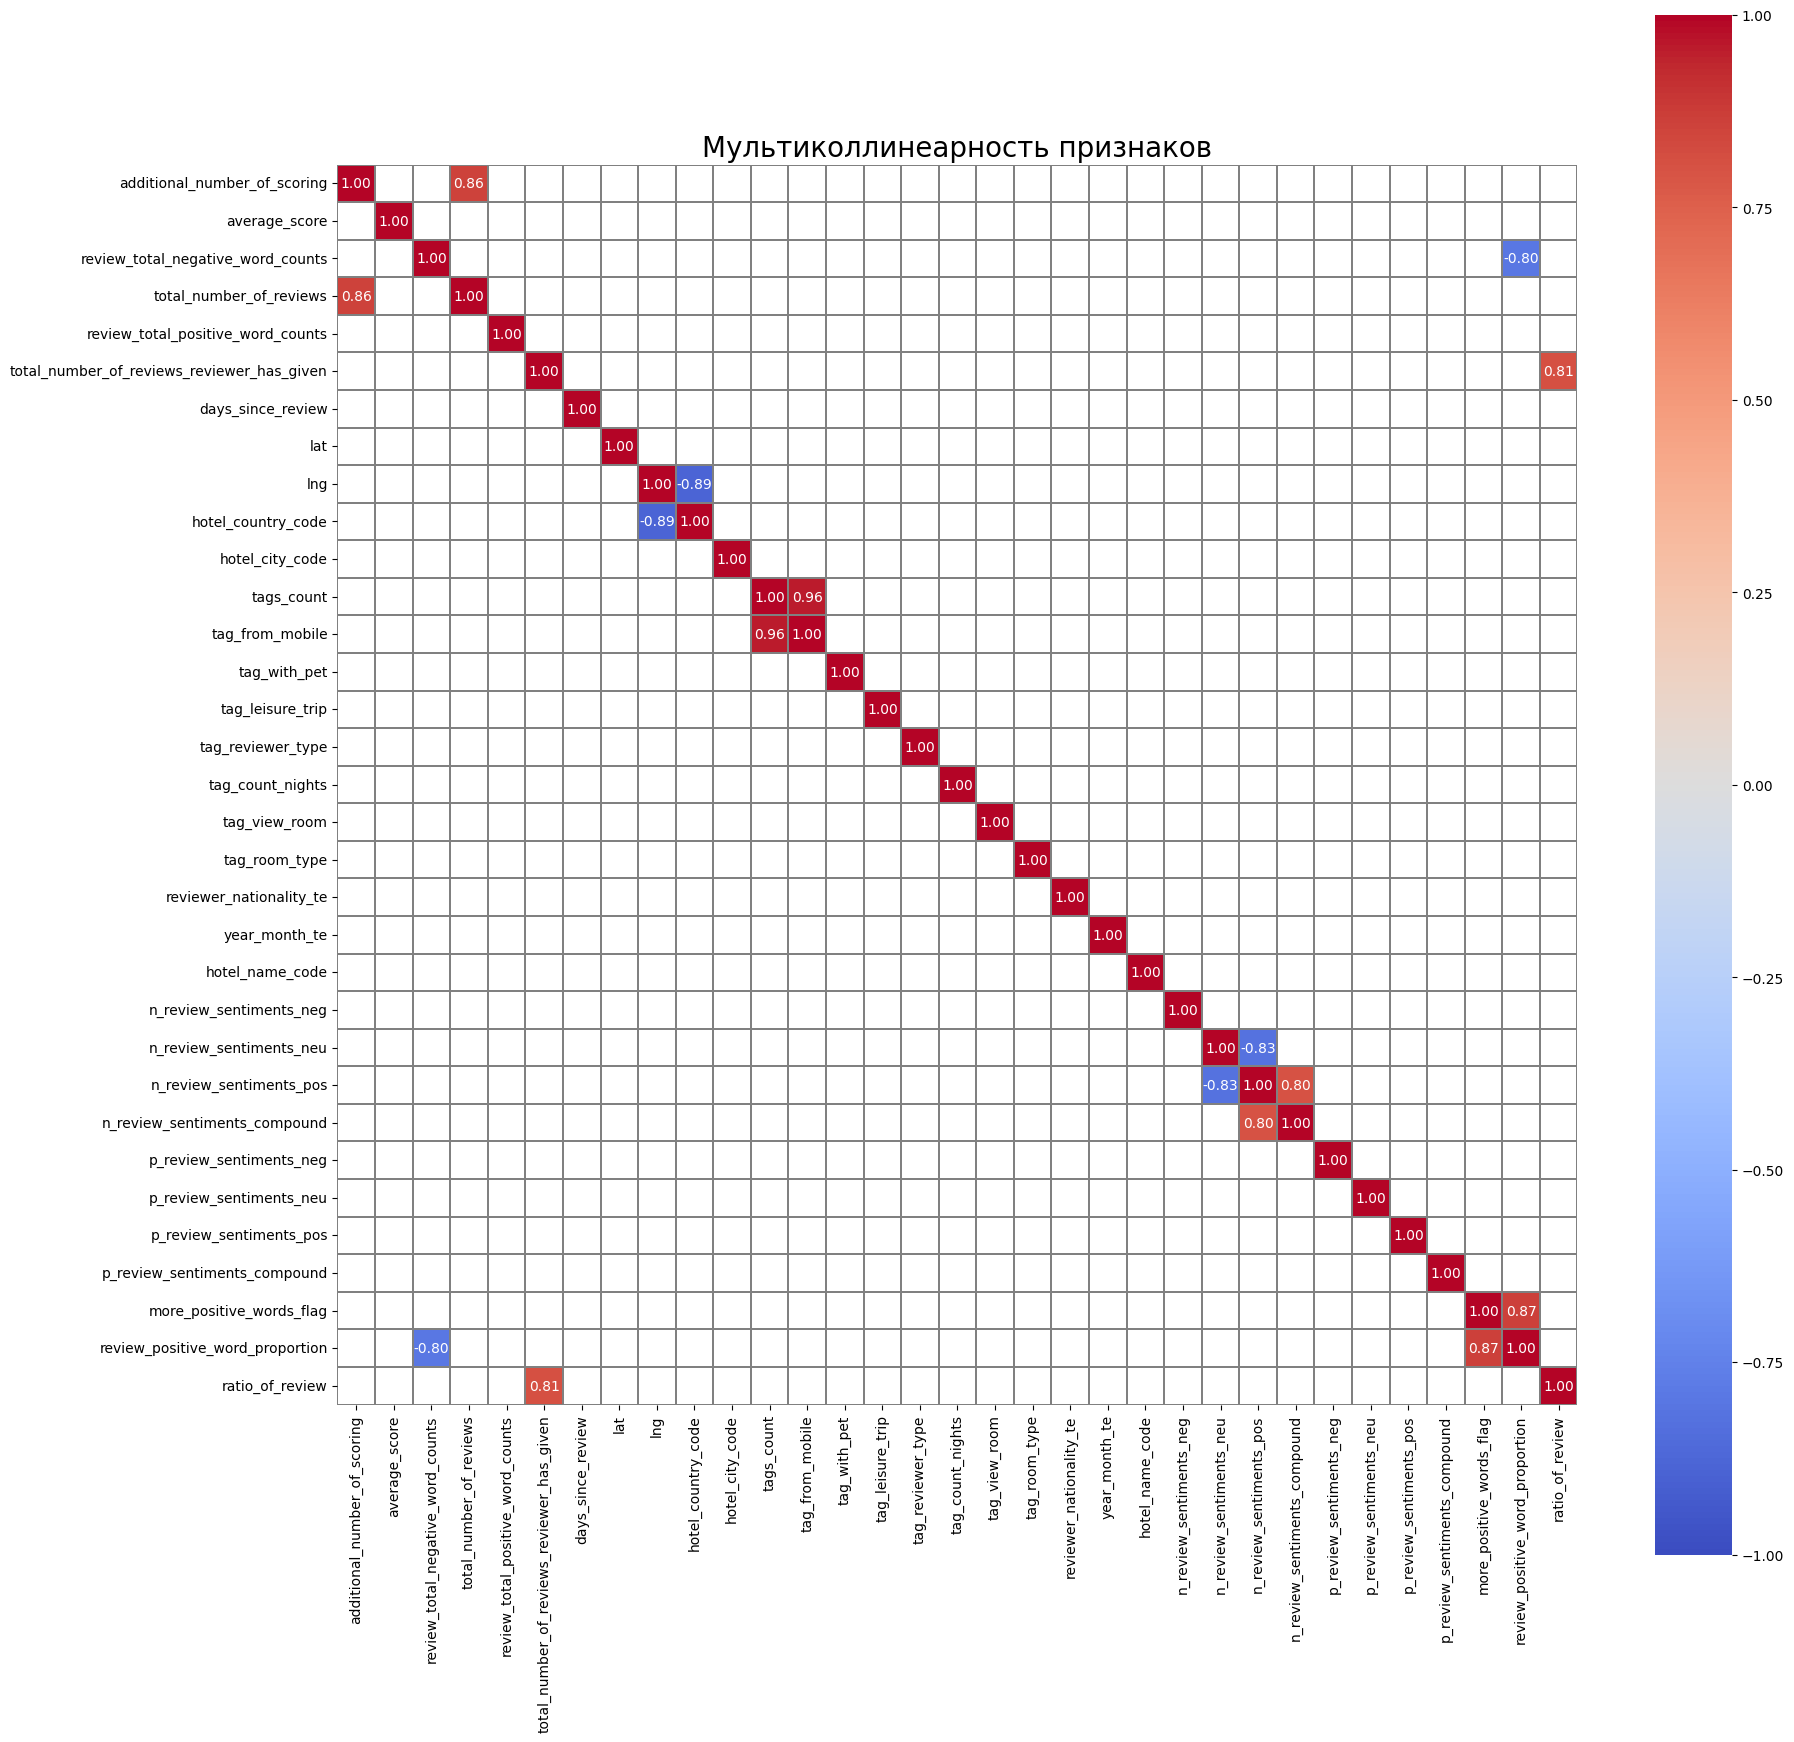

In [65]:
# Тепловая корреляционная матрица по методу Спирмана, т.к. у нас не только непрерывные переменные

corr = data.drop(['sample', 'reviewer_score'], axis=1).corr(method='spearman')
plt.subplots(figsize=(20, 20))

# Коэффициент корреляции не менее 0.7
ax_heat_multicoll = sns.heatmap(
    corr[corr.abs() >= 0.7], 
    vmin=-1, 
    vmax=1, 
    linewidth=0.1, 
    linecolor='gray', 
    cmap='coolwarm',
    annot = True,
    fmt='.2f',
    square=True
)

ax_heat_multicoll.set_title('Мультиколлинеарность признаков', fontsize=20);

Исходя из представленной тепловой матрицы смело можно удалить признаки:
- lat;
- lng.

Эти признаки ни на что не повлияют, а остальные стоит рассмотреть в разрезе оценки ANOVA и Хи-квадрат.

### **Оценка значимости признаков**

Для оценки значимости признаков будем использовать тесты:
- хи-квадрат - для категориальных,
- тест ANOVA - для числовых (непрерывных) признаков.

In [66]:
# Категориальные признаки
cat_cols = [
    'average_score',
    'reviewer_nationality_te', 
    
    'hotel_country_code', 
    'hotel_city_code', 
    'tag_from_mobile', 
    'tag_with_pet',
    'tag_leisure_trip', 
    'tag_reviewer_type', 
    'tag_count_nights', 
    'tag_view_room', 
    'tag_room_type', 
    'year_month_te', 
    'hotel_name_code', 

    'more_positive_words_flag'
]

# Числовые (непрерывные) признаки
num_cols = [
    'additional_number_of_scoring', 
    'review_total_negative_word_counts', 
    'review_total_positive_word_counts', 
    'total_number_of_reviews_reviewer_has_given', 
    'total_number_of_reviews', 
    'days_since_review', 
    
    'tags_count', 
    
    'n_review_sentiments_neg', 'n_review_sentiments_neu',
    'n_review_sentiments_pos', 'n_review_sentiments_compound',
    'p_review_sentiments_neg', 'p_review_sentiments_neu',
    'p_review_sentiments_pos', 'p_review_sentiments_compound',
    
    'review_positive_word_proportion', 
    'ratio_of_review'
]

In [67]:
# Делим датасет на 2 части, необходимые для оценки признаков
X = data[sample_mask].drop(['reviewer_score'], axis = 1) # Х - данные с информацией об отелях
y = data[sample_mask]['reviewer_score'].astype('int') # у - целевая переменная (рейтинги отелей)

In [68]:
# Функция построения тепловой матрицы корреляции для группы признаков
def show_corr_heatmap(columns_list, method='pearson', title_heat=None):
    """ Функция строит тепловую матрицу корреляции по переданным параметрам,
        на выходе - график, никакие значения не возвращаются

    Args:
        columns_list (list): список признаков, для которых строится матрица корреляции
        method (str, optional): расчётный метод корреляции. Defaults to 'pearson'.
        title_heat (str, optional): заголовок графика. Defaults to None.
    """
    _, ax_heat = plt.subplots(figsize=(15, 15))
    corr = data[columns_list].corr(method=method)
    
    # Задаём срезовую маску, выводятся параметры по нижней диагонали
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    sns.heatmap(
        corr,
        ax=ax_heat,
        vmin=-1, 
        vmax=1, 
        mask=mask,
        linewidths=0.1,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        square=True)
    
    ax_heat.set_title(title_heat, fontsize=20)
    plt.show()

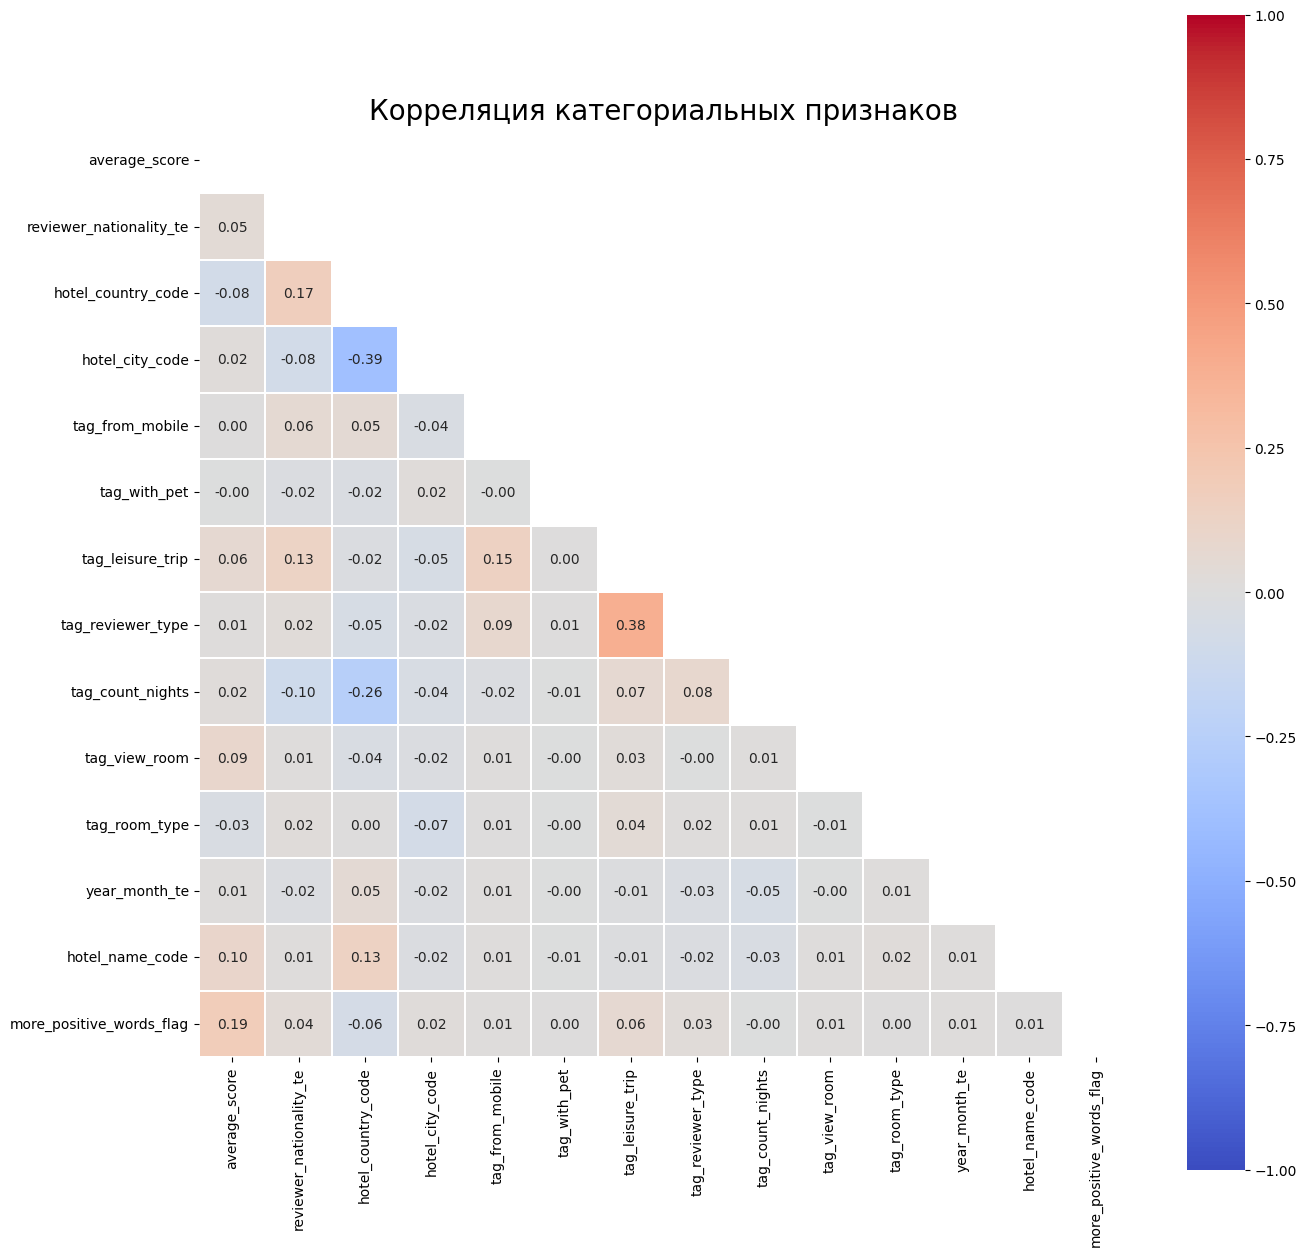

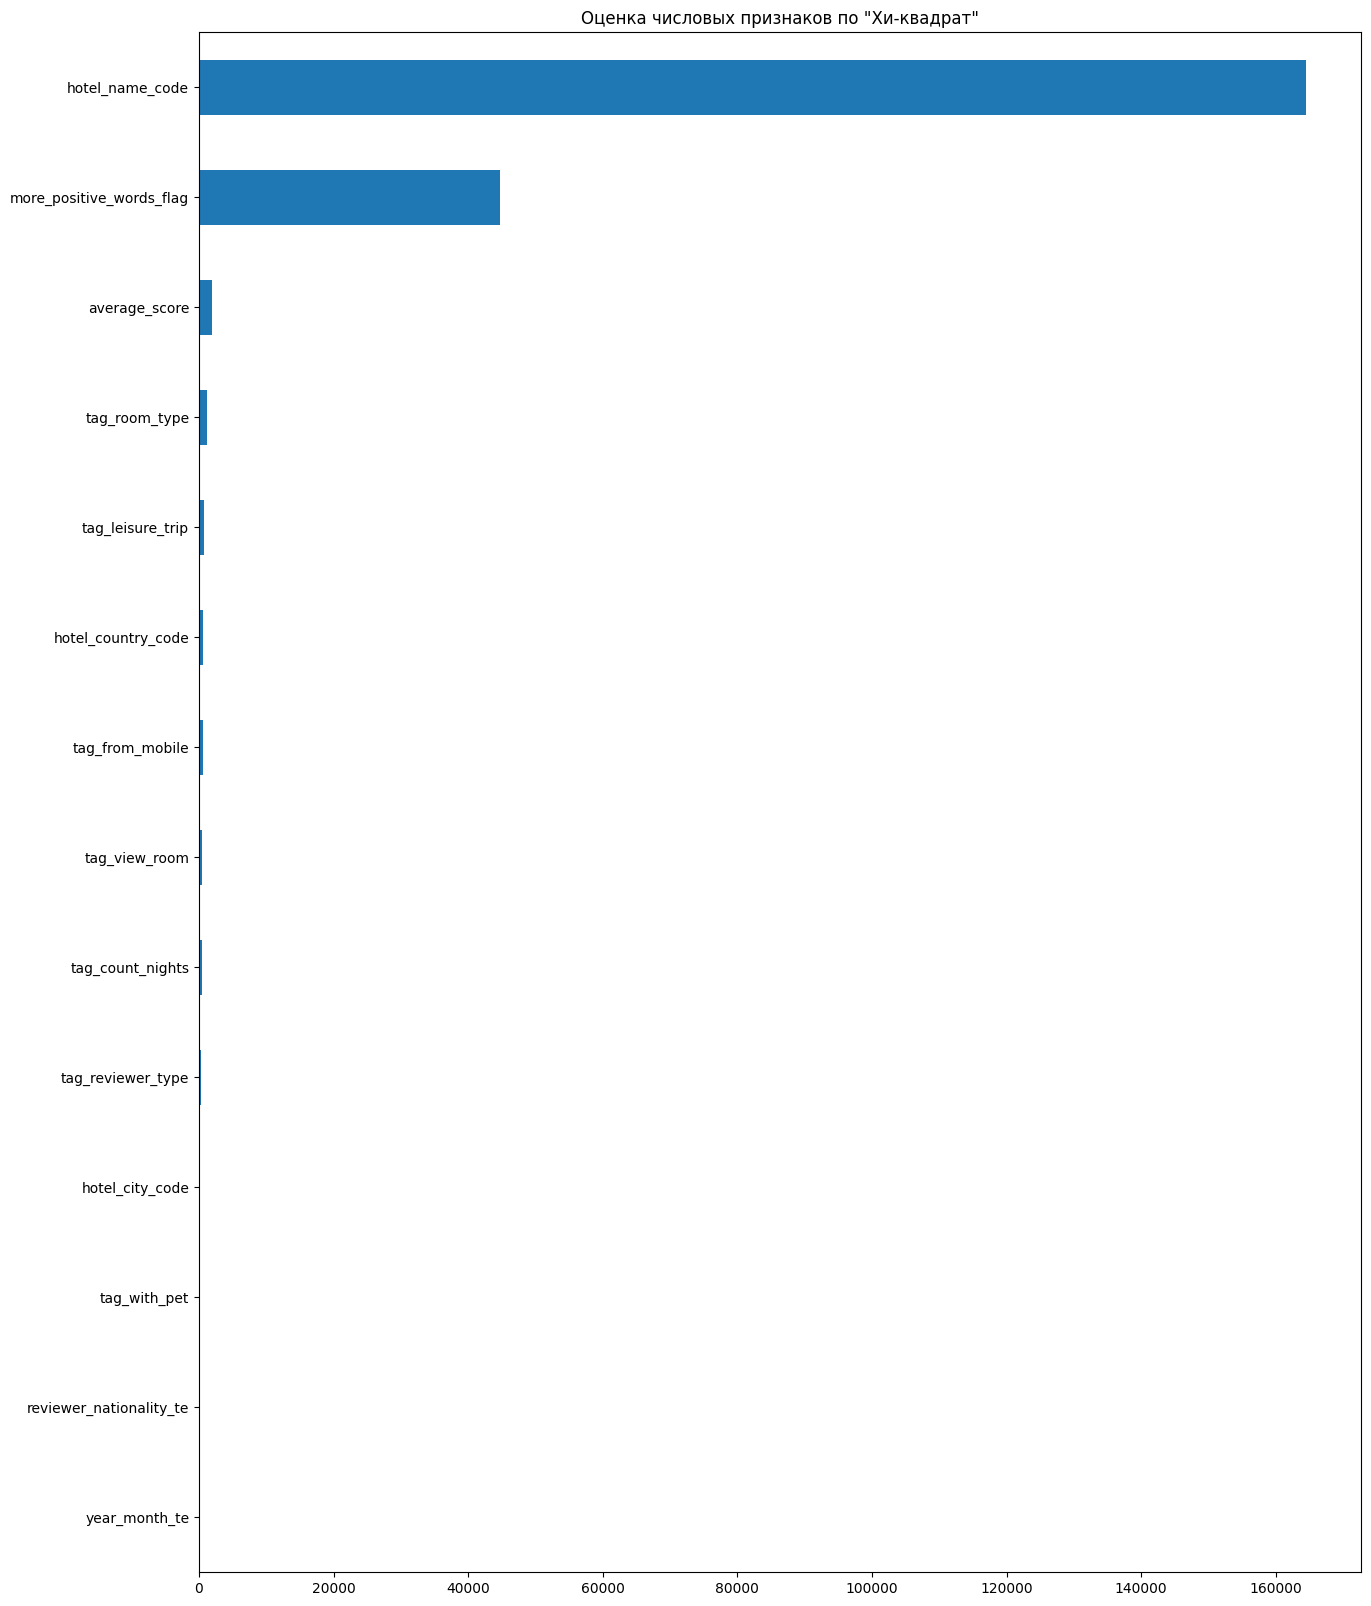

In [69]:
from sklearn.feature_selection import chi2 
# Графики для категориальных признаков

# Тепловая матрица категориальных признаков
show_corr_heatmap(
    cat_cols, 
    method='spearman',
    title_heat='Корреляция категориальных признаков'
)

# Столбчатая диаграмма категориальных признаков по "хи-квадрат"
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index = cat_cols)
imp_cat.sort_values(inplace = True)
_, ax_barh_chi2 = plt.subplots(figsize=(15, 20))
imp_cat.plot(kind = 'barh', title='Оценка числовых признаков по "Хи-квадрат"');

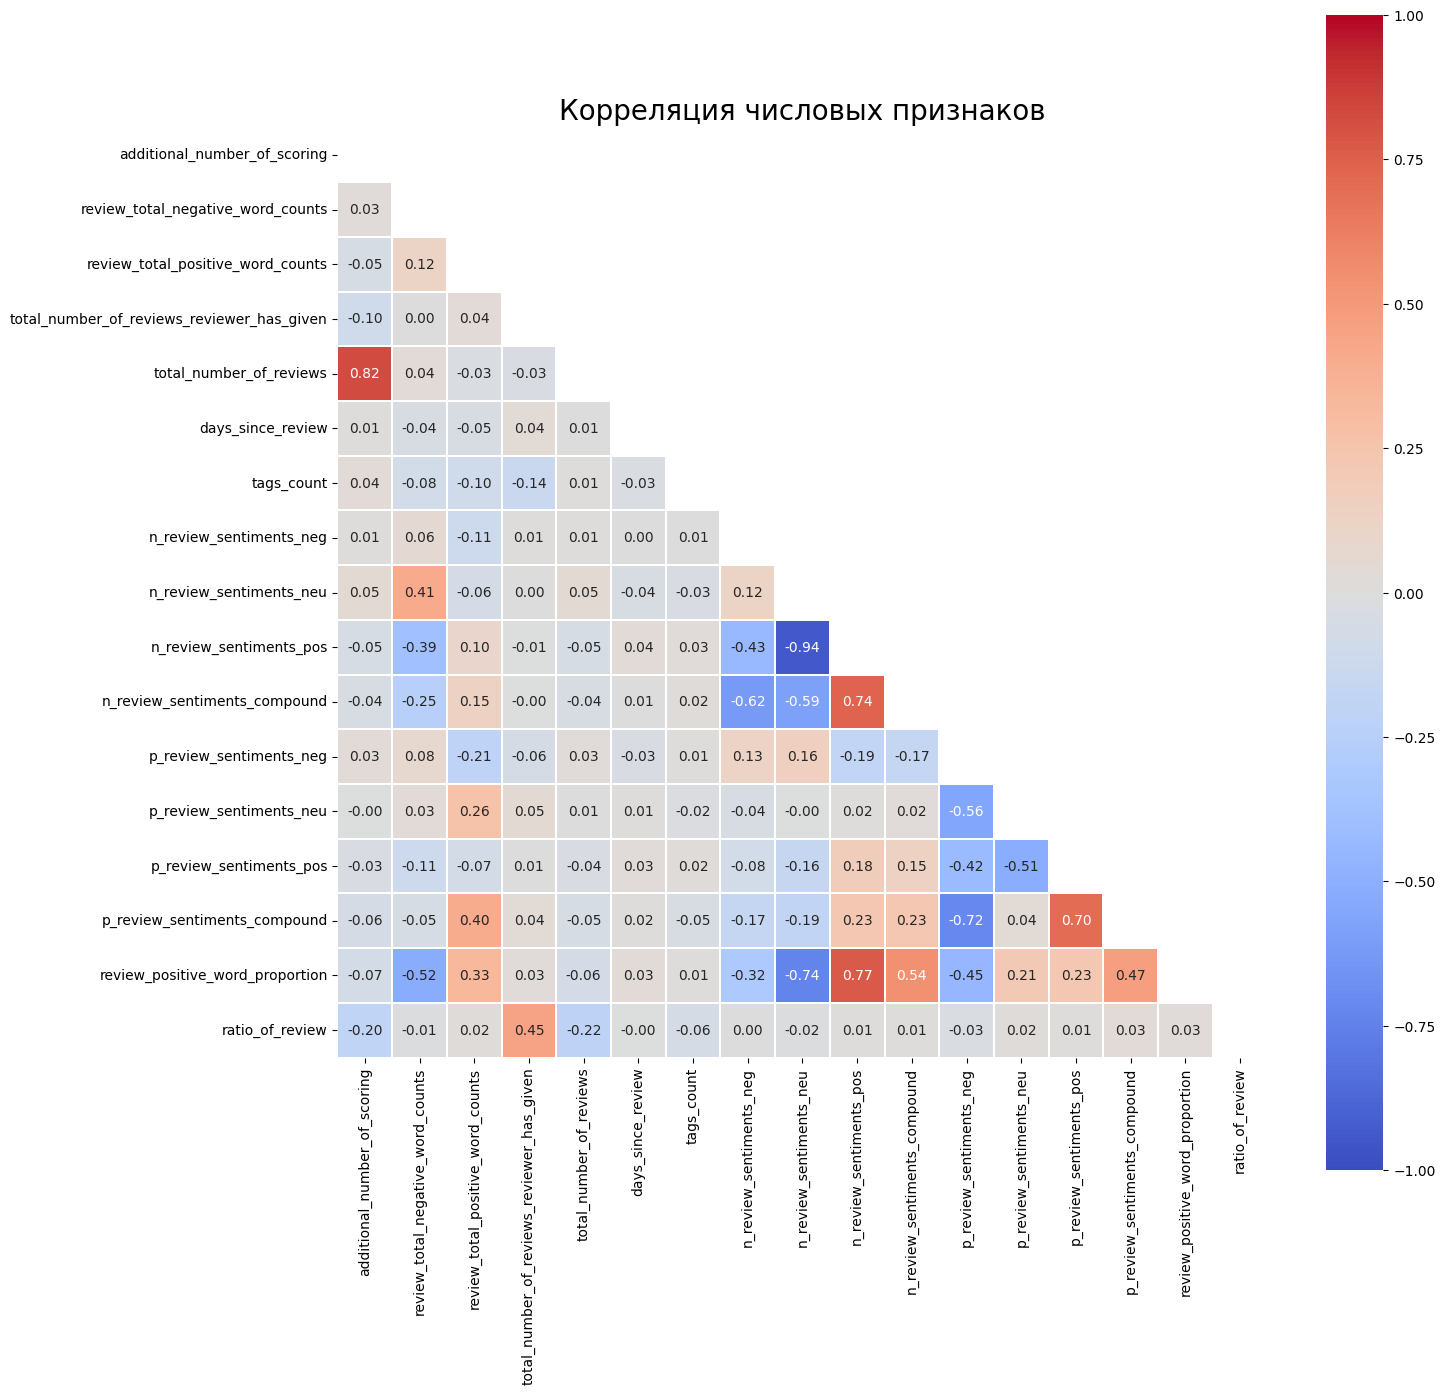

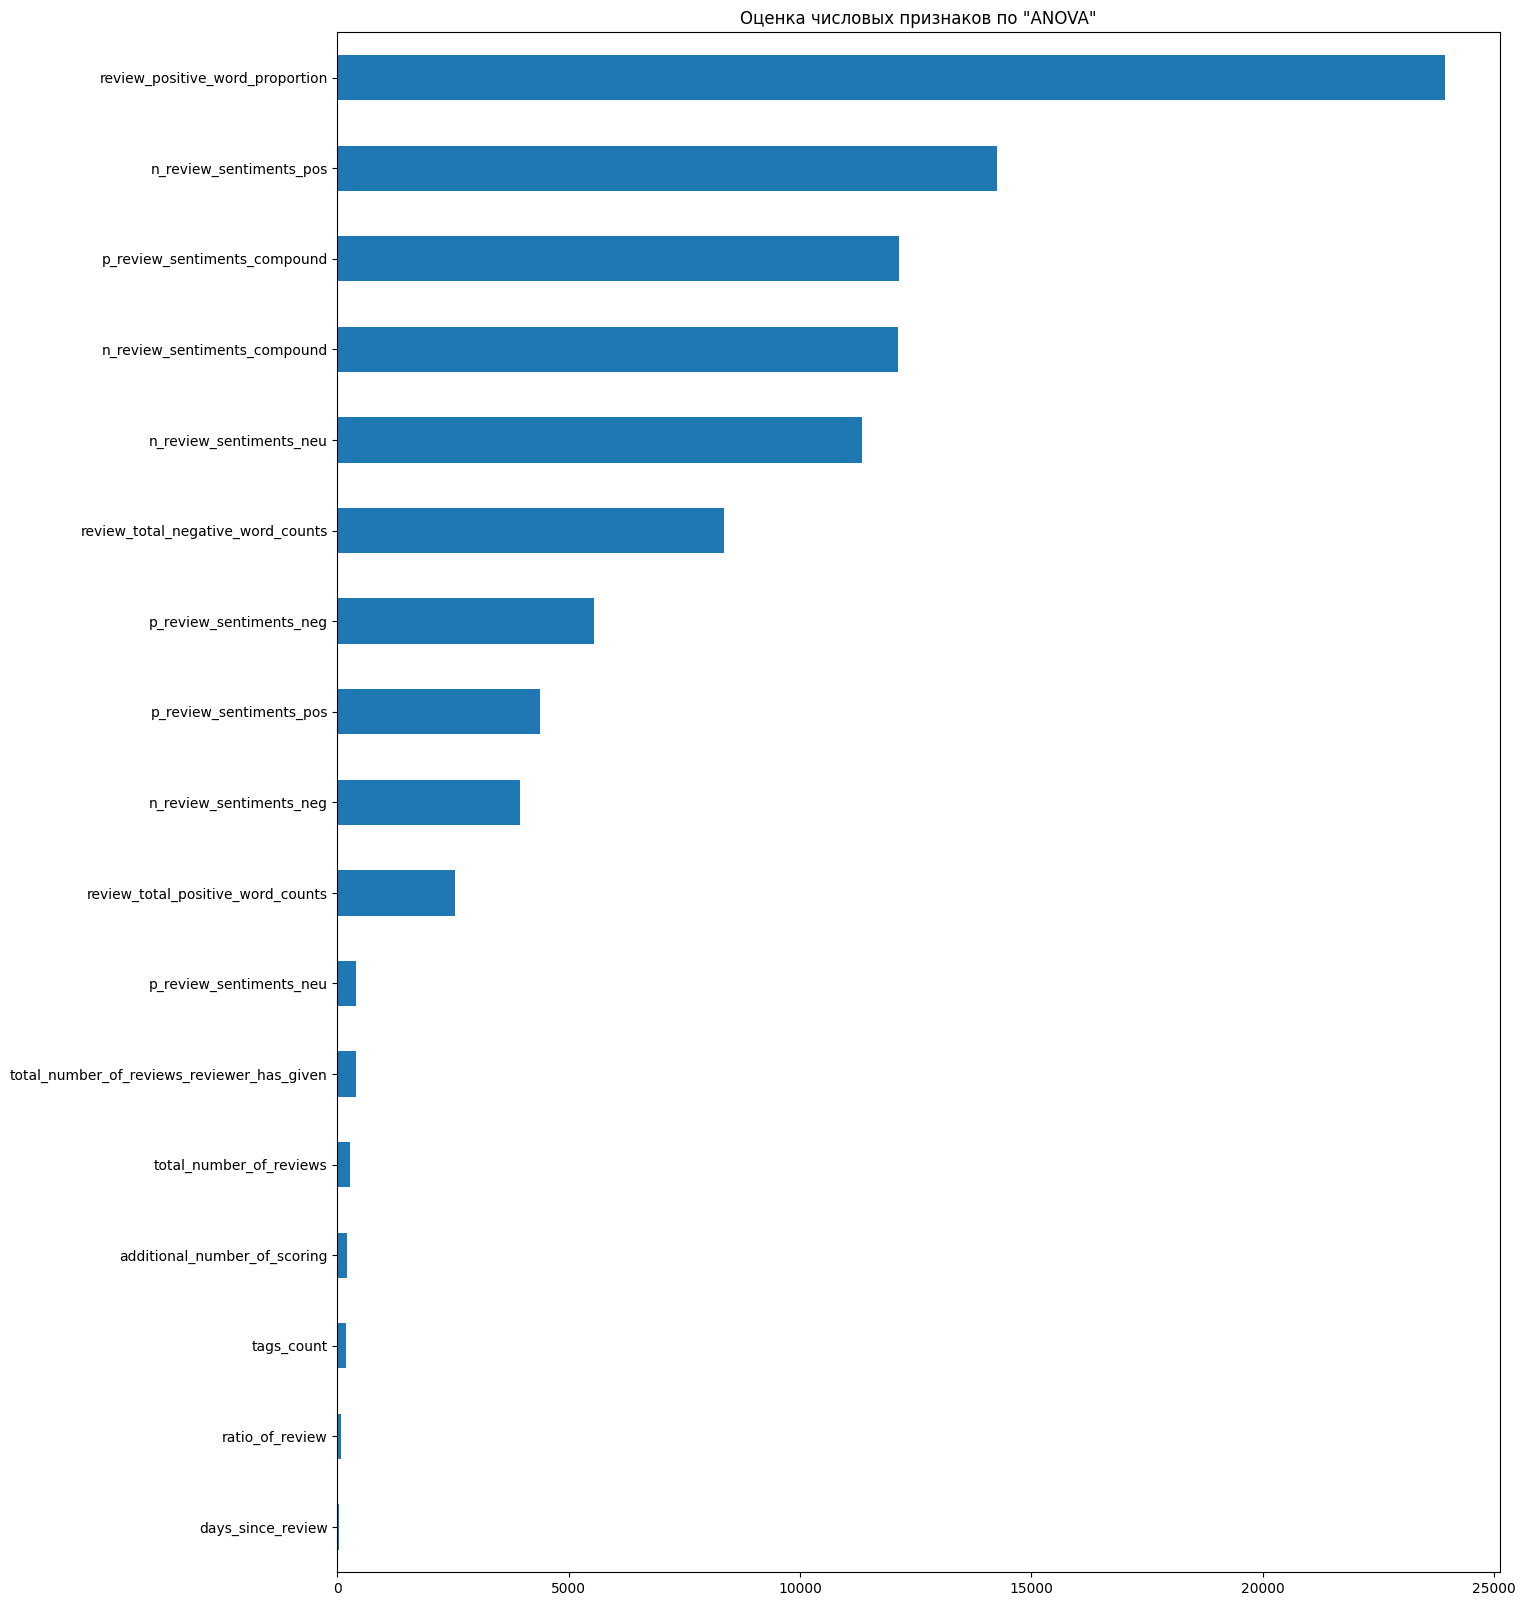

In [70]:
from sklearn.feature_selection import f_classif

# Графики для числовых признаков

# Тепловая матрица числовых признаков
show_corr_heatmap(
    num_cols, 
    method='pearson', 
    title_heat='Корреляция числовых признаков'
)

# Столбчатая диаграмма категориальных признаков по ANOVA
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
_, ax_barh_anova = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh', title='Оценка числовых признаков по "ANOVA"');

Так как удаление маловлияющих признаков влияет на точность модели (вплоть до 1-2 знака после запятой), то принято решение ограничиться удалением:

Неинформативных признаков, не влияющих на MAPE модели обучения:
- lat;
- lng.

Самые высококоррелирующие признаки:
- additional_number_of_scoring;
- n_review_sentiments_pos.

Остальные высококоррелирующие параметры оставлены для построения модели и их удалять не будет, т.к. их и создавали как вспомогательные для уточнения и корректировки при построении модели.

In [71]:
# Удаление признаков

drop_columns = [
    # просто ни с чем не связаны
    'lat', 
    'lng', 

    # имеют высокую корреляцию
    'additional_number_of_scoring', 
    'n_review_sentiments_pos'
]

data.drop(drop_columns, axis = 1, inplace=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515402 entries, 0 to 515401
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515402 non-null  float64
 1   review_total_negative_word_counts           515402 non-null  int64  
 2   total_number_of_reviews                     515402 non-null  int64  
 3   review_total_positive_word_counts           515402 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  515402 non-null  float64
 5   days_since_review                           515402 non-null  int16  
 6   sample                                      515402 non-null  int64  
 7   reviewer_score                              515402 non-null  float64
 8   hotel_country_code                          515402 non-null  int8   
 9   hotel_city_code                             515402 non-null  int8   
 

## **5. ПОВТОРНОЕ ОБУЧЕНИЕ МОДЕЛИ**

In [73]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  

X = data.drop(['reviewer_score'], axis = 1) # Х — данные с информацией об отелях  
y = data['reviewer_score'] # у — целевая переменная (рейтинги отелей)   
      
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [75]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test)
# смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE)
# показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.09069640988599076


# **Вывод: в результате проведенного анализа данных значительно удалось улучшить качество модели.**